# Erro na carga de condições de pavimento

Observe separador ";"
Separador decimal no padrão brasileiro ","
O R compreende o padrão "." como separador decimal.

![Exemplo de como os dados estão na origem.](decimais-com-virgula.png)

Vamos corrigir tudo.

In [1]:
################################################################################
# Definindo um caminho personalizado para bibliotecas R
################################################################################
# Exemplo de caminho: pode ser uma pasta dentro do seu diretório home
# Lembre-se que o R pode adicionar subdiretórios específicos da versão/arquitetura
meu_caminho_biblioteca <- "~/R/library"

# Define a variável de ambiente R_LIBS_USER para a sessão atual
Sys.setenv(R_LIBS_USER = meu_caminho_biblioteca)

# Verifica o valor da variável de ambiente
Sys.getenv("R_LIBS_USER")

# Mostra todos os caminhos de biblioteca que o R está usando
# O seu novo caminho deve aparecer aqui, geralmente como o primeiro da lista.
.libPaths()

[1] "~/R/library"

[1] "/usr/local/lib/R/site-library" "/usr/local/lib/R/library"     
[3] "/home/vscode/R/library"

In [2]:
################################################################################
#               INSTALAÇÃO E CARREGAMENTO DE PACOTES NECESSÁRIOS               #
################################################################################

# Pacotes utilizados
pacotes <- c("tidyverse", #carregar outros pacotes do R
             "knitr", "kableExtra", #formatação de tabelas
             "arrow","duckdb") # parquet e banco de dados

if(sum(as.numeric(!pacotes %in% installed.packages())) != 0){
  instalador <- pacotes[!pacotes %in% installed.packages()]
  for(i in 1:length(instalador)) {
    install.packages(instalador, dependencies = T, lib = meu_caminho_biblioteca)
    break()}
  sapply(pacotes, require, character = T, lib = meu_caminho_biblioteca) 
} else {
  sapply(pacotes, require, character = T, lib = meu_caminho_biblioteca) 
}

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: knitr

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘knitr’”
Loading required package: kableExtra


Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows


Loading required package: arrow


Attaching package: ‘arrow’


The following object is masked from ‘package:lubridate’:

 

tidyverse      knitr kableExtra      arrow     duckdb 
      TRUE      FALSE       TRUE       TRUE       TRUE

In [ ]:
# Carga de 202010A - Condições do Pavimento em Dezembro/2020
# Monte código R para carga do CSV conforme a seguir. Considere a formatação da data e dos números com vírgula que são floats e estão no formato brasileiro. Padronize os valore nulos para NA.
# Contrato;UF;Rodovia;km inicial;km final;Extensão (km);Data;Latitude;Longitude;ICC;ICP;ICM
# 01 00583/2018;AM;BR-230;213,200;212,000;1,200;30/11/2020;-7,1991363;-59,8909876;80,000;70,000;73,000
# 01 00583/2018;AM;BR-230;212,000;211,000;1,000;30/11/2020;-7,1949552;-59,8855125;80,000;70,000;73,000
# 01 00583/2018;AM;BR-230;211,000;210,000;1,000;30/11/2020;-7,1949552;-59,8855125;80,000;45,000;55,500
# 01 00583/2018;AM;BR-230;210,000;209,000;1,000;30/11/2020;-7,1949552;-59,8855125;80,000;70,000;73,000
# 01 00583/2018;AM;BR-230;209,000;208,000;1,000;30/11/2020;-7,1949552;-59,8855125;80,000;45,000;55,500
# 01 00583/2018;AM;BR-230;213,200;214,000;0,800;30/11/2020;-7,1788378;-59,846564;85,000;70,000;74,500
# 01 00583/2018;AM;BR-230;214,000;215,000;1,000;30/11/2020;-7,1923246;-59,8833152;85,000;70,000;74,500

In [ ]:
################################################################################
#                    CARGA DE DADOS - CONDIÇÕES DO PAVIMENTO    2020              #
################################################################################

# Carga do arquivo CSV com formatação brasileira
# Separador: ";"
# Decimal: ","
# Data: dd/mm/yyyy

df_pavimento <- read.csv2(
    "Trabalho/bases-de-dados/condicoes-de-pavimento/icm-dez20.csv",  # Substitua pelo caminho correto do arquivo
    sep = ";",
    dec = ",",
    na.strings = c("", "NA", "N/A"),
    colClasses = c(
        Contrato = "character",
        UF = "character",
        Rodovia = "character",
        `km inicial` = "numeric",
        `km final` = "numeric",
        `Extensão (km)` = "numeric",
        Data = "character",
        Latitude = "numeric",
        Longitude = "numeric",
        ICC = "numeric",
        ICP = "numeric",
        ICM = "numeric"
    )
)

# Conversão da coluna Data para o formato Date
df_pavimento$Data <- as.Date(df_pavimento$Data, format = "%d/%m/%Y")

# Visualização dos dados carregados
head(df_pavimento)
str(df_pavimento)

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“not all columns named in 'colClasses' exist”


,Contrato,UF,Rodovia,km.inicial,km.final,Extensao.km,Data,Latitude,Longitude,ICC,ICP,ICM
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,01 00583/2018,AM,BR-230,213.2,212,1.2,2020-11-30,-7.199136,-59.89099,80,70,73.0
2,01 00583/2018,AM,BR-230,212.0,211,1.0,2020-11-30,-7.194955,-59.88551,80,70,73.0
3,01 00583/2018,AM,BR-230,211.0,210,1.0,2020-11-30,-7.194955,-59.88551,80,45,55.5
4,01 00583/2018,AM,BR-230,210.0,209,1.0,2020-11-30,-7.194955,-59.88551,80,70,73.0
5,01 00583/2018,AM,BR-230,209.0,208,1.0,2020-11-30,-7.194955,-59.88551,80,45,55.5
6,01 00583/2018,AM,BR-230,213.2,214,0.8,2020-11-30,-7.178838,-59.84656,85,70,74.5


'data.frame':	34571 obs. of  12 variables:
 $ Contrato   : chr  "01 00583/2018" "01 00583/2018" "01 00583/2018" "01 00583/2018" ...
 $ UF         : chr  "AM" "AM" "AM" "AM" ...
 $ Rodovia    : chr  "BR-230" "BR-230" "BR-230" "BR-230" ...
 $ km.inicial : num  213 212 211 210 209 ...
 $ km.final   : num  212 211 210 209 208 214 215 198 199 200 ...
 $ Extensao.km: num  1.2 1 1 1 1 0.8 1 0.3 1 1 ...
 $ Data       : Date, format: "2020-11-30" "2020-11-30" ...
 $ Latitude   : num  -7.2 -7.19 -7.19 -7.19 -7.19 ...
 $ Longitude  : num  -59.9 -59.9 -59.9 -59.9 -59.9 ...
 $ ICC        : num  80 80 80 80 80 85 85 37.5 30 25 ...
 $ ICP        : num  70 70 45 70 45 70 70 32.5 25 25 ...
 $ ICM        : num  73 73 55.5 73 55.5 74.5 74.5 34 26.5 25 ...


In [4]:
# Adicionar coluna "Ano" com valor 2020 para todas as linhas
df_pavimento <- df_pavimento %>%
    mutate(Ano = 2020)

# Visualizar o resultado
head(df_pavimento)

,Contrato,UF,Rodovia,km.inicial,km.final,Extensao.km,Data,Latitude,Longitude,ICC,ICP,ICM,Ano
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,01 00583/2018,AM,BR-230,213.2,212,1.2,2020-11-30,-7.199136,-59.89099,80,70,73.0,2020
2,01 00583/2018,AM,BR-230,212.0,211,1.0,2020-11-30,-7.194955,-59.88551,80,70,73.0,2020
3,01 00583/2018,AM,BR-230,211.0,210,1.0,2020-11-30,-7.194955,-59.88551,80,45,55.5,2020
4,01 00583/2018,AM,BR-230,210.0,209,1.0,2020-11-30,-7.194955,-59.88551,80,70,73.0,2020
5,01 00583/2018,AM,BR-230,209.0,208,1.0,2020-11-30,-7.194955,-59.88551,80,45,55.5,2020
6,01 00583/2018,AM,BR-230,213.2,214,0.8,2020-11-30,-7.178838,-59.84656,85,70,74.5,2020


In [5]:
################################################################################
#                    CARGA DE DADOS - CONDIÇÕES DO PAVIMENTO    2021              #
################################################################################

# Carga do arquivo CSV com formatação brasileira
# Separador: ";"
# Decimal: ","
# Data: dd/mm/yyyy

df_pavimento21 <- read.csv2(
    "Trabalho/bases-de-dados/condicoes-de-pavimento/icm-dez21.csv",  # Substitua pelo caminho correto do arquivo
    sep = ";",
    dec = ",",
    na.strings = c("", "NA", "N/A"),
    colClasses = c(
        Contrato = "character",
        UF = "character",
        Rodovia = "character",
        `km inicial` = "numeric",
        `km final` = "numeric",
        `Extensão (km)` = "numeric",
        Data = "character",
        Latitude = "numeric",
        Longitude = "numeric",
        ICC = "numeric",
        ICP = "numeric",
        ICM = "numeric"
    )
)

# Conversão da coluna Data para o formato Date
df_pavimento21$Data <- as.Date(df_pavimento21$Data, format = "%d/%m/%Y")

# Visualização dos dados carregados
head(df_pavimento21)
str(df_pavimento21)

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“not all columns named in 'colClasses' exist”


,UF,Rodovia,km.inicial,km.final,Extensao.km,Data,Latitude,Longitude,Observação,ICC,ICP,ICM
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1,RS,BR-290,0.0,1.0,1.0,2021-12-01,-29.749528,-57.08938,Porto Seco Uruguaiana/RS.,20.0,0.0,6.00
2,RS,BR-290,1.0,2.0,1.0,2021-12-01,-29.749537,-57.08938,Porto Seco Uruguaiana/RS,20.0,0.0,6.00
3,RS,BR-290,2.0,2.8,0.8,2021-12-01,-29.749510,-57.08946,Porto Seco Uruguaiana/RS.,20.0,0.0,6.00
4,MA,BR-402,179.9,178.0,1.9,2021-12-01,-3.331106,-43.52749,NA,25.0,5.0,11.00
5,MA,BR-402,178.0,177.0,1.0,2021-12-01,-3.331106,-43.52749,NA,37.5,12.5,20.00
6,MA,BR-402,177.0,176.0,1.0,2021-12-01,-3.331106,-43.52749,NA,37.5,25.0,28.75


'data.frame':	41414 obs. of  12 variables:
 $ UF         : chr  "RS" "RS" "RS" "MA" ...
 $ Rodovia    : chr  "BR-290" "BR-290" "BR-290" "BR-402" ...
 $ km.inicial : num  0 1 2 180 178 ...
 $ km.final   : num  1 2 2.8 178 177 176 175 174 173 172 ...
 $ Extensao.km: num  1 1 0.8 1.9 1 1 1 1 1 1 ...
 $ Data       : Date, format: "2021-12-01" "2021-12-01" ...
 $ Latitude   : num  -29.75 -29.75 -29.75 -3.33 -3.33 ...
 $ Longitude  : num  -57.1 -57.1 -57.1 -43.5 -43.5 ...
 $ Observação : chr  "Porto Seco Uruguaiana/RS." "Porto Seco Uruguaiana/RS" "Porto Seco Uruguaiana/RS." NA ...
 $ ICC        : num  20 20 20 25 37.5 37.5 37.5 37.5 37.5 37.5 ...
 $ ICP        : num  0 0 0 5 12.5 25 5 12.5 5 5 ...
 $ ICM        : num  6 6 6 11 20 ...


In [6]:
# Adicionar coluna "Ano" com valor 2021 para todas as linhas
df_pavimento21 <- df_pavimento21 %>%
    mutate(Ano = 2021)

# Visualizar o resultado
head(df_pavimento21)

,UF,Rodovia,km.inicial,km.final,Extensao.km,Data,Latitude,Longitude,Observação,ICC,ICP,ICM,Ano
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,RS,BR-290,0.0,1.0,1.0,2021-12-01,-29.749528,-57.08938,Porto Seco Uruguaiana/RS.,20.0,0.0,6.00,2021
2,RS,BR-290,1.0,2.0,1.0,2021-12-01,-29.749537,-57.08938,Porto Seco Uruguaiana/RS,20.0,0.0,6.00,2021
3,RS,BR-290,2.0,2.8,0.8,2021-12-01,-29.749510,-57.08946,Porto Seco Uruguaiana/RS.,20.0,0.0,6.00,2021
4,MA,BR-402,179.9,178.0,1.9,2021-12-01,-3.331106,-43.52749,NA,25.0,5.0,11.00,2021
5,MA,BR-402,178.0,177.0,1.0,2021-12-01,-3.331106,-43.52749,NA,37.5,12.5,20.00,2021
6,MA,BR-402,177.0,176.0,1.0,2021-12-01,-3.331106,-43.52749,NA,37.5,25.0,28.75,2021


In [ ]:
################################################################################
#            UNIFICAÇÃO DE DADOS - CONDIÇÕES DO PAVIMENTO 2020-2021            #
################################################################################

# Combinar os dataframes de 2020 e 2021
df_pavimento_unificado <- bind_rows(df_pavimento, df_pavimento21)

# Visualizar o resultado
head(df_pavimento_unificado)
str(df_pavimento_unificado)

# Salvar em formato RData
save(df_pavimento_unificado, file = "Trabalho/bases-de-dados/condicoes-de-pavimento/condicoes-de-pavimento.Rdata")

cat("Arquivos salvos com sucesso!\n")

,Contrato,UF,Rodovia,km.inicial,km.final,Extensao.km,Data,Latitude,Longitude,ICC,ICP,ICM,Ano,Observação
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,01 00583/2018,AM,BR-230,213.2,212,1.2,2020-11-30,-7.199136,-59.89099,80,70,73.0,2020,NA
2,01 00583/2018,AM,BR-230,212.0,211,1.0,2020-11-30,-7.194955,-59.88551,80,70,73.0,2020,NA
3,01 00583/2018,AM,BR-230,211.0,210,1.0,2020-11-30,-7.194955,-59.88551,80,45,55.5,2020,NA
4,01 00583/2018,AM,BR-230,210.0,209,1.0,2020-11-30,-7.194955,-59.88551,80,70,73.0,2020,NA
5,01 00583/2018,AM,BR-230,209.0,208,1.0,2020-11-30,-7.194955,-59.88551,80,45,55.5,2020,NA
6,01 00583/2018,AM,BR-230,213.2,214,0.8,2020-11-30,-7.178838,-59.84656,85,70,74.5,2020,NA


'data.frame':	75985 obs. of  14 variables:
 $ Contrato   : chr  "01 00583/2018" "01 00583/2018" "01 00583/2018" "01 00583/2018" ...
 $ UF         : chr  "AM" "AM" "AM" "AM" ...
 $ Rodovia    : chr  "BR-230" "BR-230" "BR-230" "BR-230" ...
 $ km.inicial : num  213 212 211 210 209 ...
 $ km.final   : num  212 211 210 209 208 214 215 198 199 200 ...
 $ Extensao.km: num  1.2 1 1 1 1 0.8 1 0.3 1 1 ...
 $ Data       : Date, format: "2020-11-30" "2020-11-30" ...
 $ Latitude   : num  -7.2 -7.19 -7.19 -7.19 -7.19 ...
 $ Longitude  : num  -59.9 -59.9 -59.9 -59.9 -59.9 ...
 $ ICC        : num  80 80 80 80 80 85 85 37.5 30 25 ...
 $ ICP        : num  70 70 45 70 45 70 70 32.5 25 25 ...
 $ ICM        : num  73 73 55.5 73 55.5 74.5 74.5 34 26.5 25 ...
 $ Ano        : num  2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 ...
 $ Observação : chr  NA NA NA NA ...


ERROR: Error in write_parquet(df_pavimento_unificado, sink = "Trabalho/bases-de-dados/condicoes-de-pavimento/condicoes-de-pavimento-pq", : unused argument (partitioning = "Ano")


In [ ]:
# Usar write_dataset() para particionar por Ano
write_dataset(
    dataset = df_pavimento_unificado,
    path = "Trabalho/bases-de-dados/condicoes-de-pavimento/condicoes-de-pavimento-pq",
    format = "parquet",
    partitioning = "Ano"
)

cat("Arquivos salvos com sucesso!\n")

Arquivos salvos com sucesso!


      ICC              ICP              ICM        
 Min.   : 20.00   Min.   :  0.00   Min.   :  6.00  
 1st Qu.: 25.00   1st Qu.:  5.00   1st Qu.: 14.25  
 Median : 32.50   Median : 20.00   Median : 25.00  
 Mean   : 38.23   Mean   : 26.54   Mean   : 30.05  
 3rd Qu.: 47.50   3rd Qu.: 40.00   3rd Qu.: 40.75  
 Max.   :100.00   Max.   :100.00   Max.   :100.00  

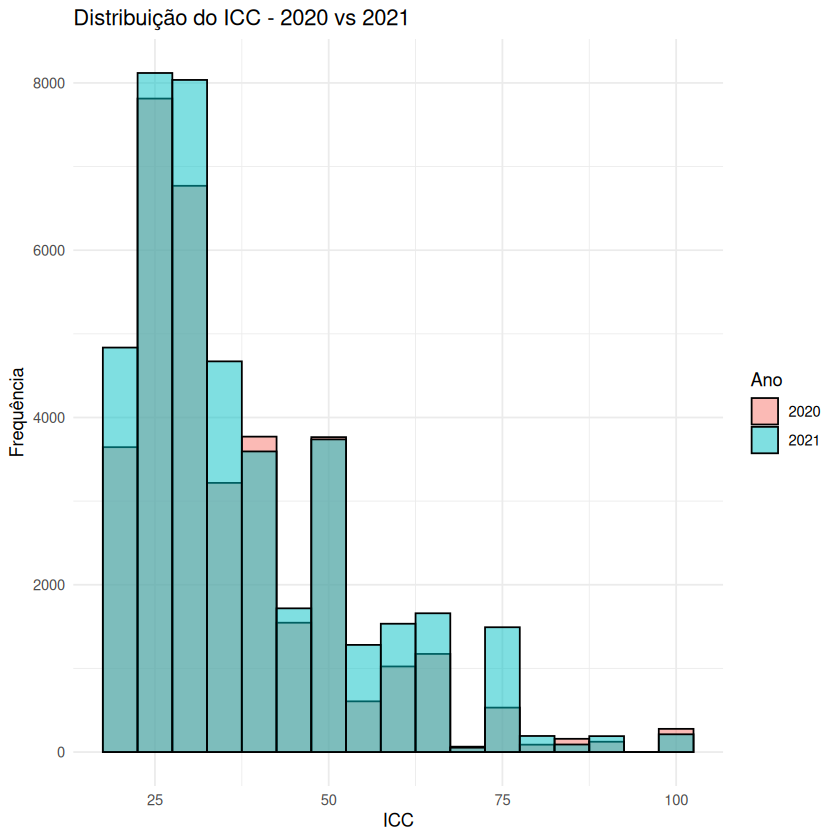

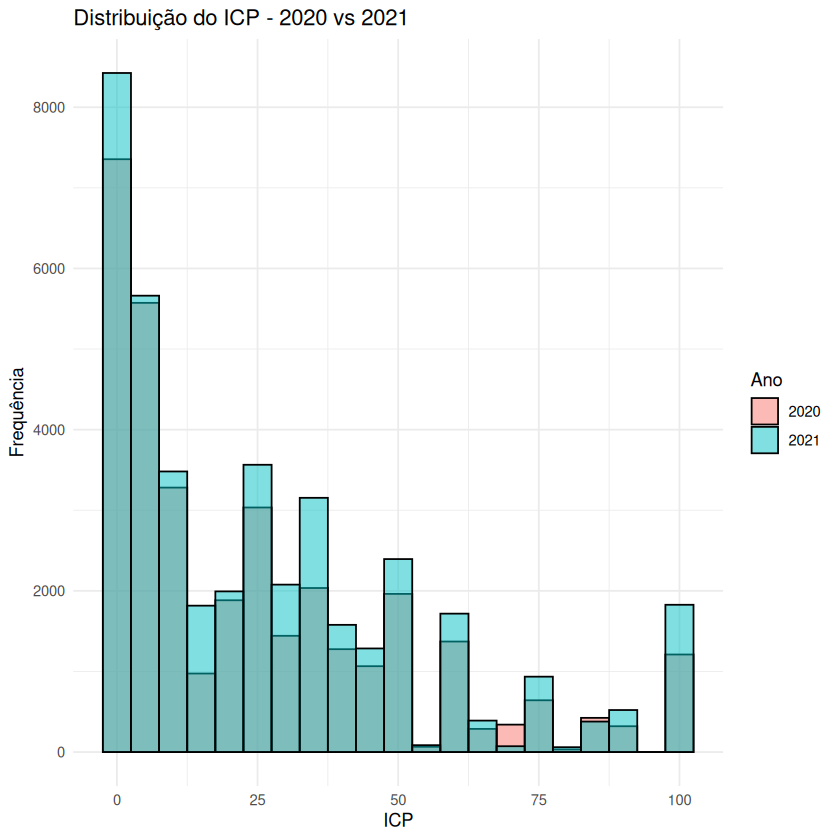

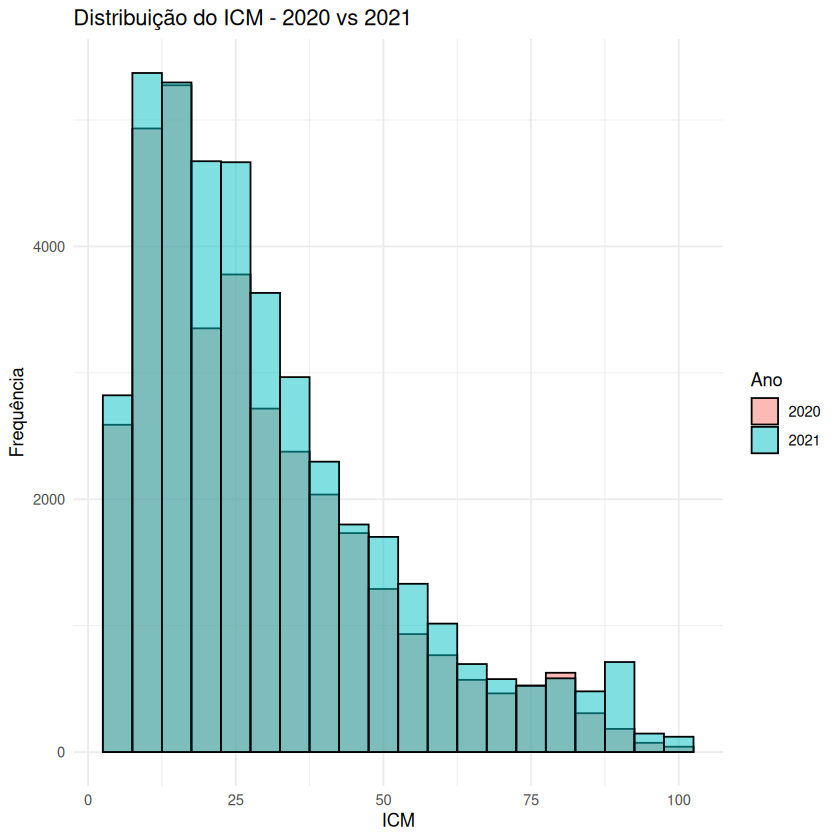

In [14]:
# Código para rodar estatisticas descritivas básicas de 
# Trabalho/bases-de-dados/condicoes-de-pavimento/condicoes-de-pavimento.Rdata, 

load("Trabalho/bases-de-dados/condicoes-de-pavimento/condicoes-de-pavimento.Rdata")
summary(df_pavimento_unificado %>% select(ICC, ICP, ICM))

#faça no mesmo gráfico a ditribuição dos dois anos da mesma variável, para vermos o contraste entre 2020 e 2021

# Usando o ggplot2 para visualizar distribuições comparando 2020 e 2021
ggplot(df_pavimento_unificado, aes(x = ICC, fill = factor(Ano))) +
    geom_histogram(binwidth = 5, color = "black", alpha = 0.5, position = "identity") +
    labs(title = "Distribuição do ICC - 2020 vs 2021", x = "ICC", y = "Frequência", fill = "Ano") +
    theme_minimal()

ggplot(df_pavimento_unificado, aes(x = ICP, fill = factor(Ano))) +
    geom_histogram(binwidth = 5, color = "black", alpha = 0.5, position = "identity") +
    labs(title = "Distribuição do ICP - 2020 vs 2021", x = "ICP", y = "Frequência", fill = "Ano") +
    theme_minimal()

ggplot(df_pavimento_unificado, aes(x = ICM, fill = factor(Ano))) +
    geom_histogram(binwidth = 5, color = "black", alpha = 0.5, position = "identity") +
    labs(title = "Distribuição do ICM - 2020 vs 2021", x = "ICM", y = "Frequência", fill = "Ano") +
    theme_minimal()
